# Review

Before talking about the central-limit-theorem (CLT), let's review some statistical and plotting knowledge that you've learned during Statistics week.

## Plot the Google lunch hour distribution

Assume that Google employee lunch hours can be modeled by a normal distribution with a mean of 2 hrs and a standard deviation of 30 minutes.  Plot the probability density function vs. lunch hour time.  Your result should look like the image below.

<img src="images/google_lhr_dist.png" alt="Drawing" style="width: 400px;"/>

Here are some hints to help you re-create this figure:    
* Try using a plot style, e.g. `plt.style.use('ggplot')` or `plt.style.use('fivethirtyeight')`
* Use `stats.norm` to make the distribution.  Instantiate the distribution as an object, e.g. `lunch = stats.norm(loc=..., scale=...)`.
* Use `np.linspace` to make your x values (the lunch hours).  
* Use the percentile point function (`.ppf`) method to ensure that your x values cover 99.8% of the distribution.
* Use the `.pdf` method on the norm object and your x values (lunch hours) to make the pdf of the lunch hours (your y-values).
* Use the object oriented way of making a plot, i.e. `fig, ax = plt.subplots(1,1)`, then `ax.plot(...`    
* Label your x and y axis labels using `ax.set_xlabel(...`, `ax.set_ylabel(...`
* Title your plot using `ax.set_title(...`
* Include a legend, `ax.legend(..`.  The legend will use whatever label you give the data in your `ax.plot(...., label='your label')` command.
<br>    
You can see almost all the hints above in action [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

## Find the middle 95% of the distribution
Use the percentile point function (ppf) to determine both the lower and upper bounds of the middle 95% of lunch hours.  
Find and print them (to two decimal places), then recreate the plot above and include vertical red, dashed, narrow lines at these upper and lower bounds. Your result should look like the image below.   

<img src="images/middle_95_lined.png" alt="Drawing" style="width: 400px;"/>



Hints:  
* ppf is used [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to find values associated with 1% and 99% (you want 2.5% and 97.5%).  
* `axvline` is documented [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)  
* You will want to use `color='red'`, `linestyle='--'` and `linewidth=1` to get red, dashed, narrow vertical lines in your plot.  
* Use f string notation along with a desired number of float digits to control the number of digits displayed when your print out the values.  See this [StackOverflow answer](https://stackoverflow.com/questions/45310254/fixed-digits-after-decimal-with-f-strings)

## Label the middle 95% using `ax.fill_between`

Instead of labeling the middle 95% of the distribution with vertical lines, color it differently using `ax.fill_between(...`.  Your plot should look like this when you're done.

<img src="images/middle_95_filled.png" alt="Drawing" style="width: 400px;"/>

<br>  
[Here](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html) is a link to documentation for `ax.fill_between(...`.  Note that the where clause takes a boolean array of the same length as your x-axis values, where `True` indicates to fill.  You can use the `np.where` as shown in the documentation, or simply provide a masked array.

## Let's talk likelihoods and probabilities
* What's the [likelihood](https://www.youtube.com/watch?v=pYxNSUDSFH4) that someone takes a 3 hour, 15 minute lunch?
* What's the probability that someone takes spends between 3 hours 14 minutes and 3 hours 16 minutes at lunch?
* What's the probability that someone takes a lunch more than 3 hours 15 minutes?  Plot it. You should get a figure like that shown below.  

<img src="images/gt_315.png" alt="Drawing" style="width: 400px;"/>

Hint:  Use the cumulative distribution method `.cdf` to determine probabilities.

# The Central Limit Theorem

### The Normal (Gaussian) Distribution

The **normal** or **gaussian** distribution has a hallowed place in statistical folklore, mostly due to the **central limit theorem** that we'll study shortly.

Carl Freidrich Gauss derived it when he was asked by an astronomer to help him locate a new planet (that he had lost).  Gauss started by modeling astronomical measurement errors and proceeded to derive it. [source](https://www.math.utah.edu/~kenkel/normaldistributiontalk.pdf)

The traditional notation for a normal random variable is $Z$ (instead of $X$, used for pretty much any other random variable).

A normal random variable $Z$ has the cumulative distribution function

$$ \Phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \int_{- \infty}^t e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } dx $$

The $\Phi$ is, again, traditional notation for the cumulative distribution function of a normal random variable. 

By differentiating, we get the density function of a normal random variable

$$ \phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } $$

The integral for the CDF of the normal distribution does *not* have a closed form.  In practice, the only way to compute values of the distribution function of a normal random variable is numerically using a computer.

### Parameters of the Normal Distribution

The $\mu$ (mean) and $\sigma$ (standard deviation) are the parameters of the distribution.  

Changing $\mu$ translates the distribution function to the right and left

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

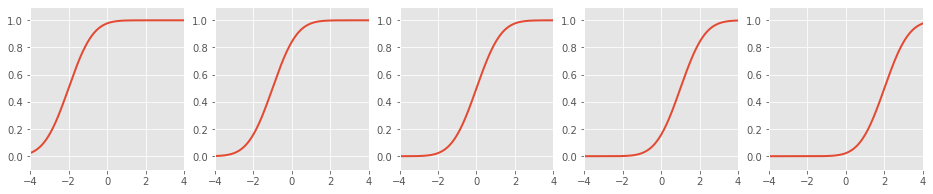

In [2]:
normal_dists_varying_mean = [
    stats.norm(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-4, 4)

#plt.tight_layout(pad=2)

Changing $\sigma$ stretches and shrinks the distribution function horizontally

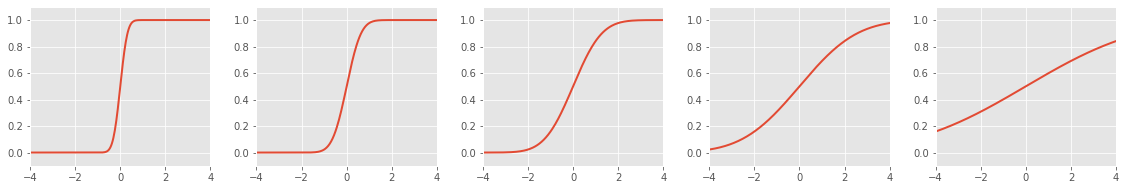

In [3]:
normal_dists_varying_sigma = [
    stats.norm(0, sigma) for sigma in [0.25, 0.5, 1, 2, 4]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_sigma[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-4, 4)
    
plt.tight_layout(pad=2)

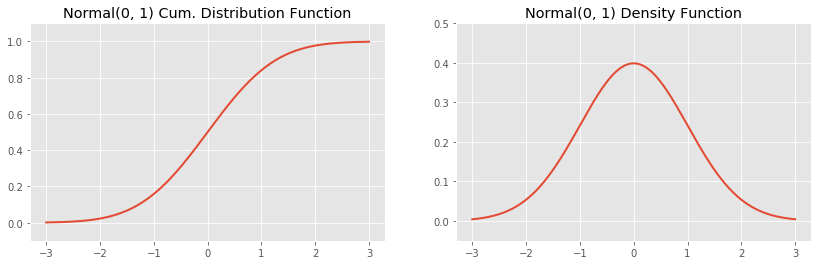

In [4]:
normal = stats.norm(0, 1) # instantiates the object <- good practice

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("Normal(0, 1) Cum. Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Normal(0, 1) Density Function");

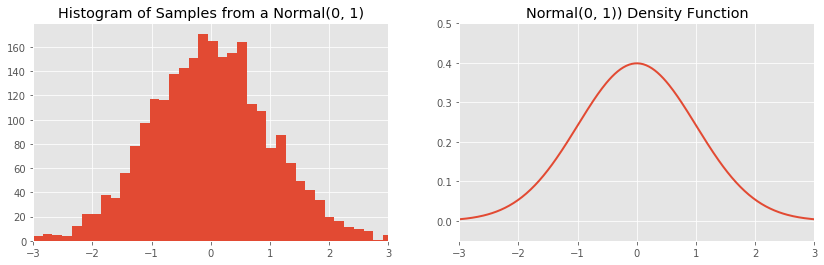

In [5]:
normal_samples = normal.rvs(2500) # drawing random samples

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4)) # 2 axes: 0, 1

# axes 0
ax[0].hist(normal_samples, bins=50, density=False)
ax[0].set_xlim(-3, 3)
#ax[0].set_ylim(-0.05, 0.5) #  use if density=True
ax[0].set_title("Histogram of Samples from a Normal(0, 1)")

# axes 1
ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Normal(0, 1)) Density Function");

## The Central Limit Theorem

A primary application of the normal distribution is the central limit theorem.  Let's show why.

### The Distribution of the Sample Means

Let's return to the distribution of a very popular statistic, the **distribution of the sample means**.

Consider a fixed population, and for the moment, suppose we have the power to sample freely, as many data points as we wish

In [6]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

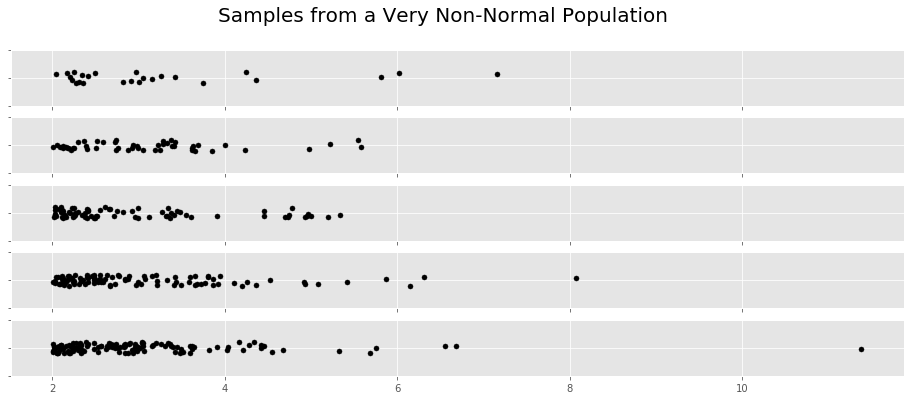

In [7]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

population = stats.expon(2)
sample_sizes = [25, 50, 75, 100, 125]
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", fontsize=20)

Suppose we fix a sample size, and repeatedly sample from the population with that fixed size

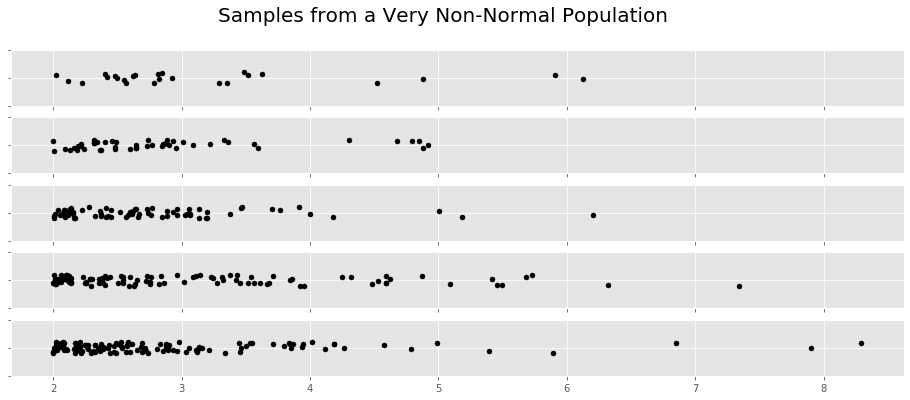

In [8]:
sample_size = 50

fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", fontsize=20)

Remember, the **sampling distribution of the mean** is the distribution of the means computed from these *different samples*.

Here, we've superimposed the sample means on each of our sample means.



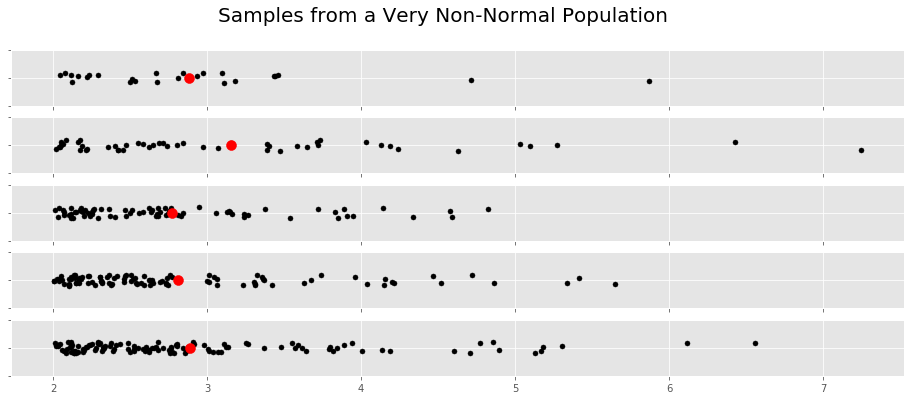

In [9]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax.scatter(sample.mean(), 0, color='red', s=100)
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", 
                 fontsize=20)

Let's do that, let's repeatedly sample, compute the means of the samples, then plot the distribution of these means.

Each of the red dots in the above visualization is counted **one time** in the histogram below.

In [10]:
def sample_from_repeated_sum(n_samples, n_summands, sampler):
    """Sample n_samples from the sum of n_summands iid copies of a random
    varaible.
    """
    samples = sampler.rvs(n_samples*n_summands).reshape(n_samples, n_summands)
    return np.sum(samples, axis=1)

def sample_means_from_population(n_samples, n_summands, sampler): 
    return (1.0/n_summands) * sample_from_repeated_sum(n_samples, n_summands, sampler)

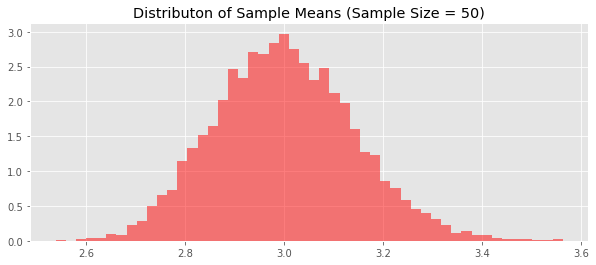

In [11]:
sample_means = sample_means_from_population(
    n_samples=10000, n_summands=50, sampler=population)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=50, density=True, color="red", alpha=0.5)
_ = ax.set_title("Distributon of Sample Means (Sample Size = 50)")

The averaging has greatly reduced the rightward skew of our original distribution. Our process has smothed out and symmetricized the original distribution.

Let's overlay a normal distribution with the correct mean and variance.

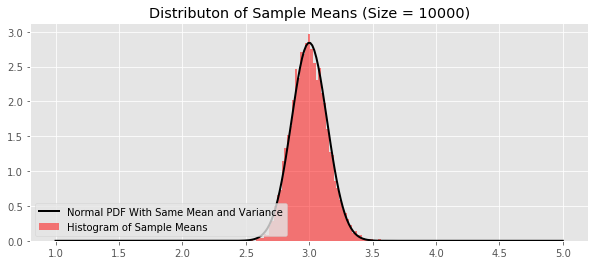

In [12]:
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
sample_means_model = stats.norm(mean_sample_means, 
                                np.sqrt(variance_sample_means))

fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(sample_means, bins=50, density=True, color="red", alpha=0.5,
            label="Histogram of Sample Means")
x = np.linspace(1, 5, num=250)
ax.plot(x, sample_means_model.pdf(x), linewidth=2, color="black", 
        label="Normal PDF With Same Mean and Variance")
ax.set_title("Distributon of Sample Means (Size = 10000)")
ax.legend(loc='lower left');

Yah, that looks pretty close.

### The Central Limit Theorem

The **central limit theorem** asserts that as we take the mean of larger and larger samples, the distribution of sample means becomes more and more normal.

Said differently, probabilistic statements about the mean of a large sample can be well approximated by assuming that the distribution of the sample means is a normal distribution with the correct mean and variance.

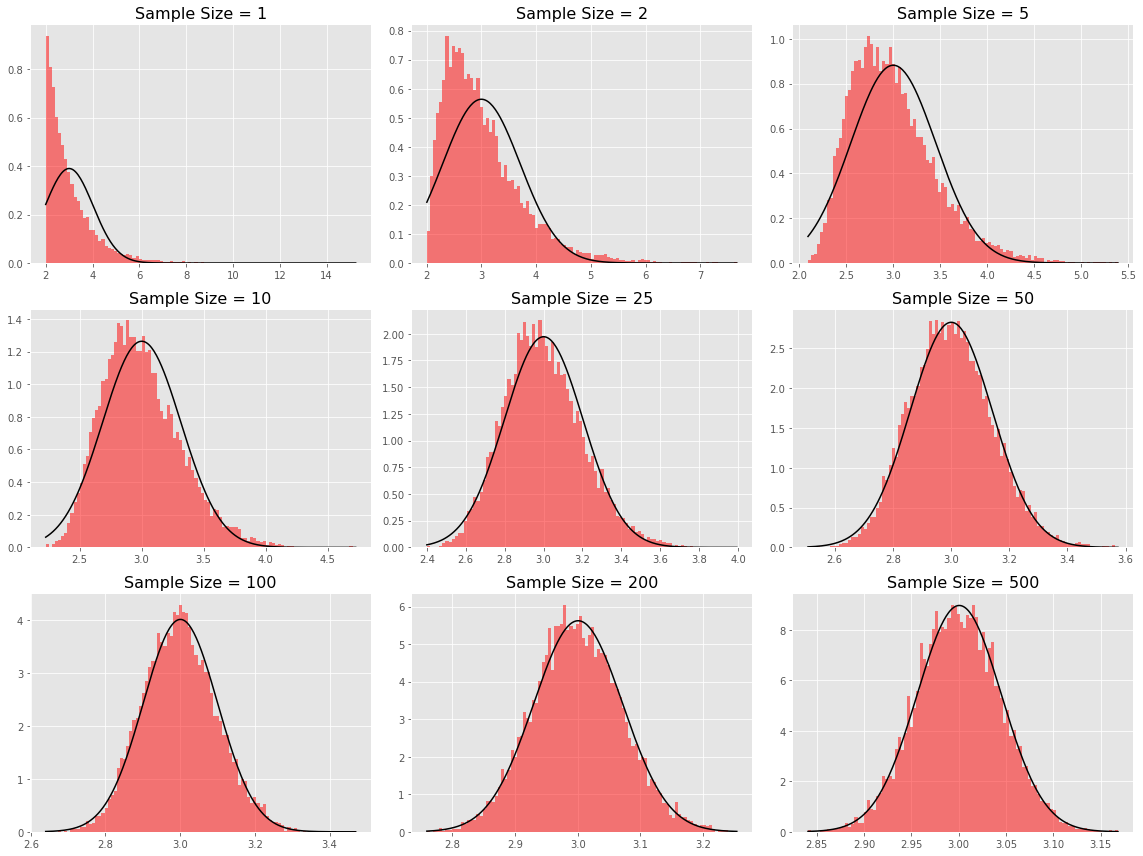

In [13]:
# running 10,000 simulations, and mean is based on varying
# size of sample
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = sample_means_from_population(
        n_samples=10000, n_summands=sample_size, sampler=population)
    variance_sample_means = np.var(sample_means)
    sample_means_model = stats.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, density=True, color="red", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t), color="black")
    _ = ax.set_title("Sample Size = {}".format(sample_size), fontsize=16)
fig.tight_layout()

### Statement of the Central Limit Theorem

Suppose $X_1, X_2, \ldots$ are i.i.d. copies of a random varaiable with finite expectation and variance

$$ E[X_1] = E[X_2] = \cdots = \mu $$
$$ var[X_1] = var[X_2] = \cdots = \sigma^2 $$

Then the distribution of sample means tends to a normal distribution with the appropriate mean and standard deviation:

$$ \frac{X_1 + X_2 + \cdots + X_k}{k} \rightarrow N \left( \mu, \frac{\sigma}{\sqrt{k}} \right) $$

as $k \rightarrow \infty$.

**Note:** The CLT also applies to a simple sum, though the mean and variance are different

$$ X_1 + X_2 + \cdots + X_k \rightarrow N \left( k \mu, \sqrt{k} \sigma \right) $$

The type of convergence is the CLT is called [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution).

A couple of notes

  - The stunning part of the central limit theorem is that it makes almost no assumptions about $X$.  $X$ can be anything, and it's sample means will always tend to be normal.
  - The central limit theorem is a **miracle**, pure and simple.  There is no real *reason* it is true, it just is.  Consider it a gift of rare order in the universe, more like a fundamental law of physics than an intuitive mathematical fact.
  - Here's an elevator pitch statement of the central limit theorem, good for job interviews: **The central limit theorem allows us to make probabilistic statements about the sample mean from any population using the normal distribution.**

### Example: The Binomial Distribution

Consider a binomial distribution $Binom(n, p)$, which assigns probabilities to the number of heads shown in $n$ flips of a coin where the probability of seeing a head in a **single flip** is $p$.

Consider a variable $X$ which is distributed as binomial

$$ X \sim Binom(n, p) $$

and also a ton of variables representing **single coin flips**

$$ X_1, X_2, \ldots \sim Binom(1, p) $$

**Claim:** $X \sim X_1 + X_2 + \cdots + X_n$

**Question:** Why?

The central limit theorem has an immediate consequence:  Binomial distributions with large $n$ tend to be approximately normal!

$$ Binom(n, p) \sim N(np, \sqrt{n p (1 - p)} ) $$

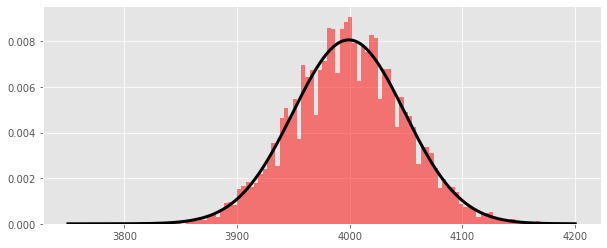

In [14]:
binomial = stats.binom(10000, 0.4)
binomial_sample = binomial.rvs(10000)

binomial_sample_mean = np.mean(binomial_sample)
binomial_sample_variance = np.var(binomial_sample)
normal_approx = stats.norm(
    binomial_sample_mean, np.sqrt(binomial_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(binomial_sample, bins=100, density=True, color="red", alpha=0.5)
x = np.linspace(3750, 4200, num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3, color="black");

An immediate consequence: Binomial probabilities with large $n$ can be well approximated using the normal distribution.

### Check for understanding: Binomial Probabilities

You flip a fair coin 10,000 times.  What is the probability that you flip heads between 5000 and 5100 times?

* Work it out using the scipy.stats binomial distribution.  
* Then work it out using the scipy.stats normal distribution.

Do you get the same answer?

## The Central Limit Theorem: The Point

When we are concerned with a **sample mean**, the central limit theorem lets us derive the **actual distribution of the sample mean**.  This allows us to calculate probabilities about the sample mean.

We are going to make good use of this when we design statistical hypothesis tests.

### Example: CLT Based Confidence Interval for the Sample Mean

Consider our sample from a secret population, which we have used as a running example

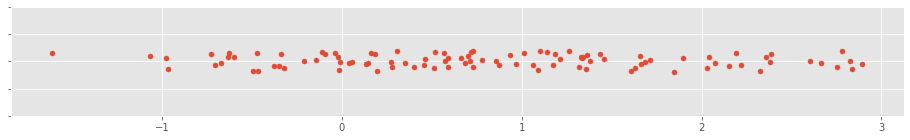

In [15]:
data = stats.norm(0.9, 1.0).rvs(100)

fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

Here are the facts we have accumulated about this situation

  - The sample mean is an approximation of the population mean: the expected value of the sample mean *is* the population mean.
  - The sample mean is approximately normally distributed, the mean and variance of this normal distribution can be computed in terms of the population mean and variance, and the size of the sample.
  
Let's denote by 
  - $\mu$ the population mean.
  - $\sigma^2$ the population variance.
  - $\bar x$ the **sample mean**.
  
Then we can summarize all this as

$$ \bar x \sim N \left( \mu, \frac{\sigma}{\sqrt{n}} \right) $$  

where $$ \frac{\sigma}{\sqrt{n}} $$ is the effective standard deviation of the sampling distribution of the sample mean, commonly called the [standard error.](https://en.wikipedia.org/wiki/Standard_error)  
<br>

If we subtract the population mean from both sides we get

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

Which allows us to make probabilistic statements about how far the sample mean is from the population mean.

A **confidence interval** is the answer to a question like this

> How far do I have to go to the left and the right of the sample mean so that 95% of the time (i.e. in 95% of possible samples) I will have enclosed the population mean?

Let $\alpha$ denote the distance you move to the left and right of the sample mean when drawing your interval.  In notation, we are asking to find $\alpha$ such that

$$ P(\bar x - \alpha \leq \mu \leq \bar x + \alpha) = 0.95 $$

This is the same as asking for

$$ P( - \alpha \leq \mu - \bar x \leq \alpha ) = 0.95 $$

The thing in the middle here, $\mu - \bar x$, has a known distribution!

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

So, visually, we are looking for:

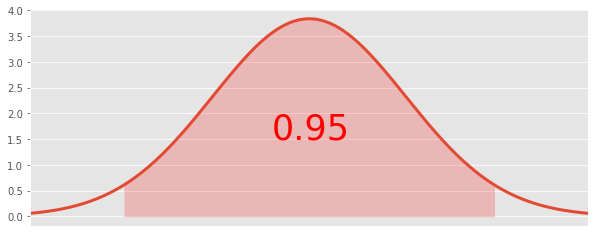

In [16]:
sample_mean = np.mean(data)
sample_varaince = np.var(data)
distribution_of_sample_minus_population_mean = stats.norm(0, np.sqrt(sample_varaince / len(data)))

fig, ax = plt.subplots(1, figsize=(10, 4))
x = np.linspace(-0.3, 0.3, num=250)
pdf = distribution_of_sample_minus_population_mean.pdf(x)
ax.plot(x, pdf, linewidth=3)

# Shade under curve
# Note: The 0.2 here is just for illustration, it does not correspond to
#       any particular value of alpha.

ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.2 <= x) * (x <= 0.2) ), color="red", alpha=0.2)
ax.text(-0.04, 1.5, "0.95", fontsize=35, color="red")
ax.set_xticks([]);

The shaded region is the area under the density between $-\alpha$ and $\alpha$. We want the **shaded region** to account for $0.95$ of the total area.

This means that each *half* of the shaded area to the *left and right* of zero should account for $0.475$ of the total area.

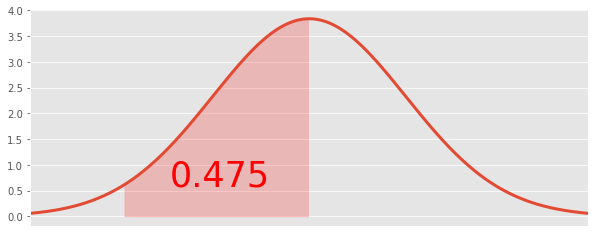

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.2 <= x) * (x <= 0.0) ), color="red", alpha=0.2)
ax.text(-0.15, 0.6, "0.475", fontsize=35, color="red")
ax.set_xticks([]);

Which means that the "tail" to the left of $\alpha$ should account for $0.5 - 0.475 = 0.025$ of the total area.

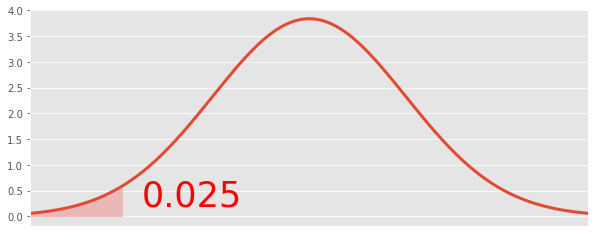

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.2) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.set_xticks([]);

It is **this kind of area that is computed by the distribution function**.

So, if we denote by $F$ the **distribution function of** $ N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $, then we are after the value of $\alpha$ satisfying

$$ F(-\alpha) = 0.025 $$

Or $$F^{-1}(0.025) = -\alpha$$

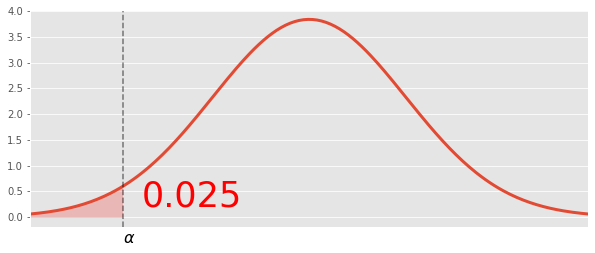

In [19]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.2) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.axvline(x=-0.2, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(-0.2, -0.5, r"$\alpha$", fontsize=16)
_ = ax.set_xticks([]);

The **inverse of the distribution function** is often called the **percentile function**.

In [20]:
alpha = distribution_of_sample_minus_population_mean.ppf(0.025)
print("Sample Mean: {:2.2}".format(sample_mean))
print("95% confidence interval for the population mean: [{:2.2}, {:2.2}]".format(
    sample_mean + alpha, sample_mean - alpha)
    )

Sample Mean: 0.82
95% confidence interval for the population mean: [0.61, 1.0]


Recall our interpretation here

> If we draw samples from the population and compute this confidence interval many, many times, then the computed interval should envelop the true population parameter approximately 95% of the time.

In this case, I wrote the code to create the population, so I know the correct answer

**The population mean is $0.1$.**

So let's run a simulation and see if everything worked.

In [21]:
def compute_confidence_interval(data, confidence_width):
    sample_mean = np.mean(data)
    sample_varaince = np.var(data)
    distribution_of_sample_minus_population_mean = stats.norm(0, np.sqrt(sample_varaince / len(data)))
    alpha = distribution_of_sample_minus_population_mean.ppf(0.5 - 
                                                            (confidence_width / 2.0))
    # Alpha is negative
    return sample_mean + alpha, sample_mean - alpha

In [22]:
population_mean_is_in_interval = []
for i in range(1000):
    new_data = stats.norm(0.1, 0.1).rvs(100)
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    population_mean_is_in_interval.append(left_endpoint <= 0.1 <= right_endpoint)
    
print("Proportion of confidence intervals containing the true parameter: {:2.2f}".format(
        np.mean(population_mean_is_in_interval)))

Proportion of confidence intervals containing the true parameter: 0.96


Which is what we would expect.

To dive the point home, we can plot all of these confidence intervals along with the true parameter, and visually see which do and do not contain the parameter.

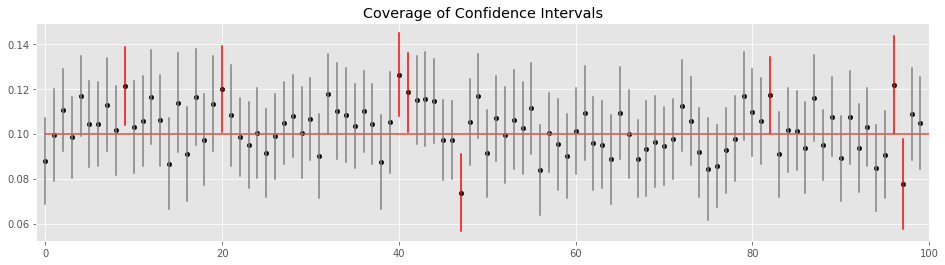

In [23]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot([0, 100], [0.1, 0.1])

for i in range(100):
    new_data = stats.norm(0.1, 0.1).rvs(100)
    sample_mean = new_data.mean()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    color = "grey" if (left_endpoint <= 0.1 <= right_endpoint) else "red"
    ax.plot([i, i], [left_endpoint, right_endpoint], color=color)
    ax.scatter([i], [sample_mean], c="black", s=20)
    ax.set_xlim(-1, 100)
    
ax.set_title("Coverage of Confidence Intervals");

### Check for Understanding: Confidence Interval
[UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) has an [Activity Recognition from Chest Mounted Accelerometer](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer) dataset which recorded uncalibrated accelerations a person experienced while performing various activities at 52 Hz (52 measurements per second).  In the `data` folder there is a subset of this data, which is vertical (z) acceleration a person experiences during two activities: walkin and climbing stairs.

What is the average vertical acceleration experienced by those walking, and by those climbing stairs?  For each, calculate the 95% confidence interval.

Instead of using the ppf, you can use the [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) to approximate how many standard deviations away from the mean contain 95% of the data.

# Review answers

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 13})

### Plot the Google lunch hour distribution

In [25]:
mu = 2 # mean
sigma = 0.5 #standard deviation

lunch = stats.norm(loc=mu, scale=sigma)

time_low = lunch.ppf(0.001)
time_high = lunch.ppf(0.999)
num_times = 100

times = np.linspace(time_low, time_high, num_times)
lunch_pdf = lunch.pdf(times)

print(time_low.round(2))
print(time_high.round(2))

0.45
3.55


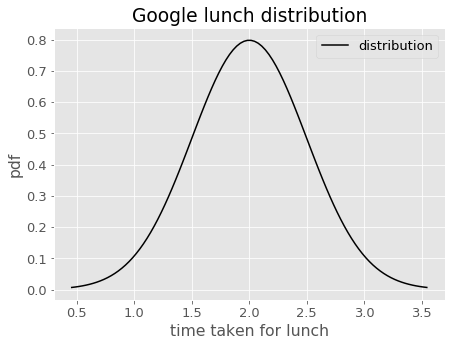

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Google lunch distribution')
ax.legend()
plt.show()

### Find the middle 95% of the distribution

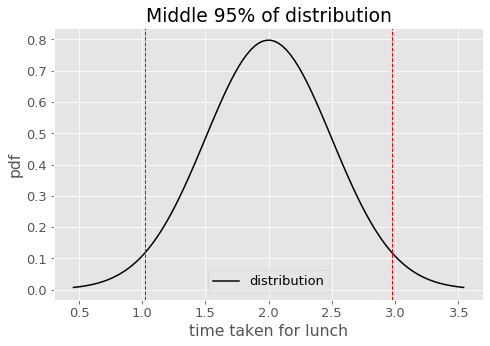

In [27]:
time_025 = lunch.ppf(0.025)
time_975 = lunch.ppf(0.975)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.axvline(time_025, color='red', linestyle='--', linewidth=1)
ax.axvline(time_975, color='red', linestyle='--', linewidth=1)
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Middle 95% of distribution')
ax.legend()
plt.tight_layout()
plt.show()

### Label the middle 95% using `ax.fill_between`

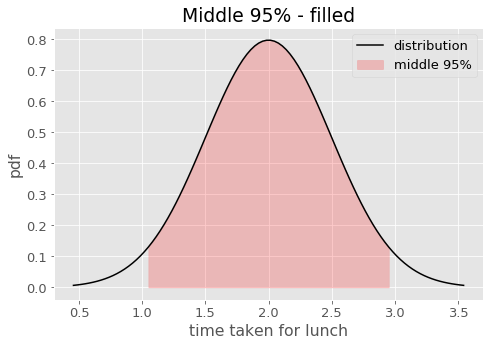

In [28]:
mask_gt = times >= time_025
mask_lt = times <= time_975
mask_middle = mask_gt & mask_lt

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.fill_between(times, lunch_pdf, 0, 
                where=mask_middle, color="red", alpha=0.2, label='middle 95%')
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Middle 95% - filled')
ax.legend(loc='upper right')
plt.tight_layout(w_pad=0.5)
plt.show()

### Let's talk likelihoods and probabilities

In [29]:
likelihood = lunch.pdf(3.25)
print(f"The likelihood of a 3 hr 15 minute lunch is {likelihood:0.3f}.")
time_314 = 3 + 14/60
time_316 = 3 + 16/60
prob_1 = lunch.cdf(time_316) - lunch.cdf(time_314)
print(f"The probability of a lunch taking between 3 hr 14 min and "
      f"3 hr 16 min is {prob_1:0.4f}.")
prob_2 = 1 - lunch.cdf(3.25)
print(f"The probability of lunch being greater than 3 hr 15 minutes is "
      f"{prob_2:0.4f}.")

The likelihood of a 3 hr 15 minute lunch is 0.035.
The probability of a lunch taking between 3 hr 14 min and 3 hr 16 min is 0.0012.
The probability of lunch being greater than 3 hr 15 minutes is 0.0062.


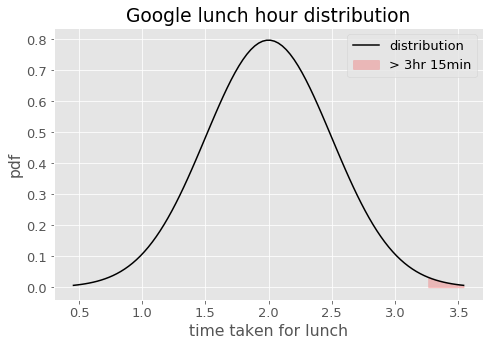

In [30]:
mask_gt = times > 3.25

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.fill_between(times, lunch_pdf, 0, 
                where=mask_gt, color="red", alpha=0.2, label='> 3hr 15min')
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Google lunch hour distribution')
ax.legend(loc='upper right')
plt.tight_layout(w_pad=0.5)
plt.show()

<br>  
<br>  
<br>  
<br>  

###  Check for understanding: Binomial Probabilities  
They're approximately the same.

In [31]:
n = 10000
p = 0.5
coin_binom = stats.binom(n,p)
prob_binom = coin_binom.cdf(5100) - coin_binom.cdf(4999)
prob_binom.round(3)

0.482

In [32]:
mu = n * p
std = np.sqrt(n * p * (1 - p))
coin_norm = stats.norm(mu, std)
prob_norm = coin_norm.cdf(5100) - coin_norm.cdf(4999)
prob_norm.round(3)

0.485

<br>  
<br>  
<br>  
<br>  

### Check for understanding: Confidence Interval

In [33]:
import pandas as pd

df = pd.read_csv('data/z_acceleration.csv')

n = df.shape[0]

walking_mean = df['walking'].mean()
climbing_mean = df['climbing_stairs'].mean()

walking_std = df['walking'].std()
climbing_std = df['climbing_stairs'].std()

walking_sem = walking_std / np.sqrt(n)
climbing_sem = climbing_std / np.sqrt(n)

In [34]:
def confidence_interval(mean, sem, num_std):
    CI = [mean - num_std * sem, mean + num_std * sem]
    return [round(val, 1) for val in CI]

# 2 standard deviations away from mean contain ~ 95% of the area
# of the distribution
walking_CI = confidence_interval(walking_mean, walking_sem, 2)
climbing_CI = confidence_interval(climbing_mean, climbing_sem, 2)

print(f"The walking mean acceleration CI is {walking_CI} to 95% confidence.")
print(f"The climbing mean acceleration CI is {climbing_CI} to 95% confidence.")

The walking mean acceleration CI is [2038.5, 2045.0] to 95% confidence.
The climbing mean acceleration CI is [2127.7, 2136.6] to 95% confidence.
